In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import torch.optim as optim
import yaml
import pickle
import pdb
from torch.utils.data import DataLoader
from data import dataset
from trainer import Trainer
from tqdm import tqdm
import importlib.util as imp


In [2]:
with open("/home/andrea/Scrivania/Tesi/leonardo/config_env.yaml", 'r') as f:
    config_env = yaml.safe_load(f)

In [3]:
###### nameofthemodel_paststep_futurestep.pt #####
past_step = config_env['setting']['past_step']
future_step = config_env['setting']['future_step']
for name in os.listdir(config_env['paths']['list_models']):
    tmp = f"{name}_{past_step}_{future_step}.pt"
    PATH = os.path.join(config_env['paths']['models'], tmp)
    if os.path.exists(PATH):
        ############### CARICO LA RELATIVA CLASSE ######################
        file_path = os.path.join(config_env['paths']['list_models'], name, 'model.py')
        # Create a module spec
        spec = imp.spec_from_file_location('model.py', file_path)
        # Import the module
        module = imp.module_from_spec(spec)
        spec.loader.exec_module(module)

        ############### INSTANZIO LA CLASSE ######################
        model = getattr(module, name)
        
        print(model)
    

<class 'model.py.GLSTM'>
<class 'model.py.GLSTMseq2seq'>
<class 'model.py.GCN_LSTM'>
<class 'model.py.GAT_LSTMseq2seq'>
<class 'model.py.GAT_LSTM'>


In [14]:
from importlib import import_module

In [ ]:
mod = import_module(p)
met = getattr(mod, m)

In [4]:
config_env['paths']

{'data': '/home/andrea/Scrivania/Tesi/leonardo/data/dataset',
 'adj': '/home/andrea/Scrivania/Tesi/leonardo/data/adj',
 'models': '/home/andrea/Scrivania/Tesi/leonardo/best_models',
 'config': '/home/andrea/Scrivania/Tesi/leonardo/config',
 'list_models': '/home/andrea/Scrivania/Tesi/leonardo/models',
 'fig': '/home/andrea/Scrivania/Tesi/leonardo/figures'}

In [39]:
tmp = {'GLSTM': 219.0885526595577, 'GLSTMseq2seq': 215.43065409506522, 'GCN_LSTM': 214.49795981376403, 'GAT_LSTMseq2seq': 214.40938666559035, 'GAT_LSTM': 211.62982005457724}
tmp = pd.DataFrame(tmp.items(), columns = ['model', 'score']).sort_values(by = 'score').reset_index(drop = True)
tmp.head()

,model,score
0,GAT_LSTM,211.629820
1,GAT_LSTMseq2seq,214.409387
2,GCN_LSTM,214.497960
3,GLSTMseq2seq,215.430654
4,GLSTM,219.088553


In [42]:
tmp['past_step']= past_step
tmp['future_step']= future_step

In [43]:
tmp

,model,score,past_step,future_step
0,GAT_LSTM,211.629820,30,50
1,GAT_LSTMseq2seq,214.409387,30,50
2,GCN_LSTM,214.497960,30,50
3,GLSTMseq2seq,215.430654,30,50
4,GLSTM,219.088553,30,50


In [3]:
tmp = pd.read_csv("./GAT_LSTMseq2seq_dropout.csv", index_col=0)
tmp.head()

,name,score
0,0.0,29353.540234
1,0.1,8393.896387
2,0.2,39354.747852
3,0.3,69223.865234
4,0.4,38628.950781


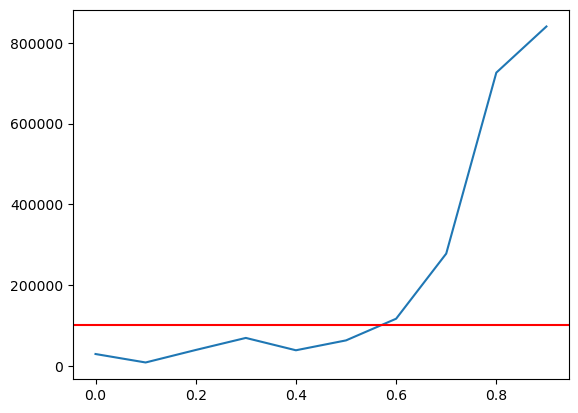

In [14]:
plt.plot(tmp.name, tmp.score)
plt.axhline(100000, color = "red")
plt.show()